# ***Ejemplo Clasificación de Iris Data Set (3 características)***

El objetivo de este ejercicio, es poder ampliar el espectro del Perceptrón y no solo dejar la idea vaga de que solo se puede usar 2 características para la clasificación, por el contrario, se pueden usar cuantas se deseen, para este ejercicio, se ha usado a propósito (3) para mirar el funcionamiento y final solución que debe de conllevar a una superficie de separación tipo Plano.

Esta versión usa el algoritmo de clase **Perceptron**:


*   Permite escoger la **función de activación** a usar: Step function o Bipolar Step function. [Por defecto Bipolar Step function]

*   Permite seleccionar **entre dos métodos para la inicialización de los pesos sinápticos y bias aleatorios**. Uno más eficiente que el otro, con el objetivo de poder visualizar el cambio en el error por cada época de entrenamiento y así la complejidad en la convergencia del algoritmo. [Por defecto el método más óptimo]


Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 3

Partiendo de la idea, de que ya se ha realizado un EDA previo, se sabe que las características que permiten la mejor separabilidad en las clases Iris Setosa e Iris Versicolor son:

1.   Longitud del sépalo. [LS]
2.   Ancho del sépalo. [AS]
3.   Largo del pétalo. [LP]

Por tanto, para este ejercicio, se usa exclusivamente estas tres características.

Recuerde que solo se usan dos clases:

*   Iris Setosa
*   Iris Versicolor

Dado que el perceptrón por su naturaleza propia, solo permite la clasificación BINARIA.





Se grafican los datos mencionados:

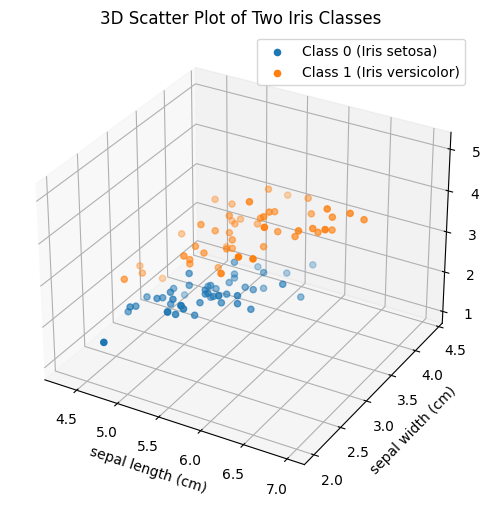

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Crear una figura tridimensional
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar las dos clases en el espacio tridimensional
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], label=f'Class {int(label)} (Iris {iris.target_names[int(label)]})')

# Etiquetas de los ejes
ax.set_xlabel(best_features[0])
ax.set_ylabel(best_features[1])
ax.set_zlabel(best_features[2])

# Título de la gráfica
ax.set_title('3D Scatter Plot of Two Iris Classes')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

Con el objetivo de explorar mejor la distribución de los datos, se presenta un gráfico interactivo en el cual podrá graduar dos angulos para visualizar mejor los datos:

Si usa en angle1 = 230° y angle 2= 140°, podra observar como efectivamente la distribución de los datos para ambas clases permite ver que hay una fácil separación lineal, lo que indicaría que el Perceptrón puede solucionar este ejercicio planteado.

## **Codigo para grafica tridimensional Interactiva**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from ipywidgets import interact, fixed

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Función para graficar el scatter plot
def plot_3d_scatter(angle1, angle2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for label in np.unique(y):
        ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], label=f'Class {int(label)} (Iris {iris.target_names[int(label)]})')

    ax.set_xlabel(best_features[0])
    ax.set_ylabel(best_features[1])
    ax.set_zlabel(best_features[2])

    ax.set_title('3D Scatter Plot of Two Iris Classes')

    ax.legend()

    ax.view_init(angle1, angle2)  # Establecer ángulos de vista

    plt.show()

# Utilizar interact para crear una visualización interactiva
interact(plot_3d_scatter, angle1=(0, 360, 10), angle2=(0, 360, 10))


interactive(children=(IntSlider(value=180, description='angle1', max=360, step=10), IntSlider(value=180, descr…

<function __main__.plot_3d_scatter(angle1, angle2)>

Para una interacción total, se desarrolla el gráfico TRIDIMENSIONAL para explorar los datos a un mayor detalle:

In [3]:
import plotly.graph_objs as go
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features[0]),
        yaxis=dict(title=best_features[1]),
        zaxis=dict(title=best_features[2])
    ),
    title='3D Scatter Plot of Two Iris Classes'
)

# Mostrar la figura interactiva
fig.show()


Se procede con la clasificación cargando de nuevo los datos para ser organizados rapidamente:

In [10]:
from ipywidgets import interact, fixed

In [9]:
# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


La solución a plantear del Perceptrón es:

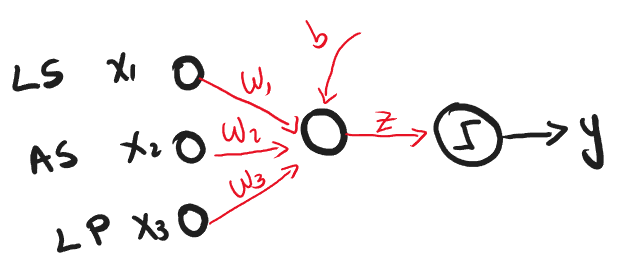

Se separa la matriz de características X:

In [12]:
# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values

print(X)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

Se separa el vector de clases verdaderas y:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = class_0_1_data['target'].values
y = np.where(y==0,-1,1)

print(y)



[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


Clase **Perceptron**

Documentada mediante comentarios:

In [14]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

Se inicializa el objeto tipo **Perceptron** teniendo en cuenta que la función de activación es Escalon Binario Bipolar (Así se definió los valores de y anteriormente) y para efectos de visualización se usa el método de pesos aleatorios menos eficiente (para ver los efectos de una convergencia lenta):

In [23]:
ppn =Perceptron(eta=0.2, n_iter=100, Af='bipolar_step_function', Rw=1)

In [24]:
ppn.fit(X,y)

Se observa la variabilidad de los valores de bias, w1, w2 y w3 a lo largo de cada iteración:

In [25]:
print(ppn.w_historical)

[array([ -4.14889976,  11.01622467, -24.99428126,  -9.88337137]), array([ -2.94889976,  18.65622467, -21.31428126,  -4.40337137]), array([ -3.34889976,  18.17622467, -22.23428126,  -2.28337137]), array([ -3.74889976,  16.97622467, -23.55428126,  -1.52337137]), array([ -4.14889976,  16.01622467, -24.39428126,  -0.72337137]), array([ -4.14889976,  16.61622467, -24.31428126,   0.51662863]), array([ -4.54889976,  15.65622467, -25.15428126,   1.31662863]), array([ -4.54889976,  16.17622467, -25.03428126,   2.55662863]), array([ -4.94889976,  14.97622467, -25.87428126,   3.27662863]), array([ -4.94889976,  15.53622467, -25.51428126,   4.67662863]), array([ -5.34889976,  13.57622467, -26.71428126,   4.11662863]), array([ -5.34889976,  13.57622467, -26.71428126,   4.11662863]), array([ -5.34889976,  13.57622467, -26.71428126,   4.11662863]), array([ -5.34889976,  13.57622467, -26.71428126,   4.11662863]), array([ -5.34889976,  13.57622467, -26.71428126,   4.11662863]), array([ -5.34889976,  13

Se observa como la convergencia no es tan rápida hasta alcanzar el valor de 0:

In [26]:
print(ppn.errors_)

[3, 5, 3, 3, 2, 3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Se realiza un gráfico del error para observar el desempeño a lo largo de las épocas:

Text(0, 0.5, 'Número de actualizaciones')

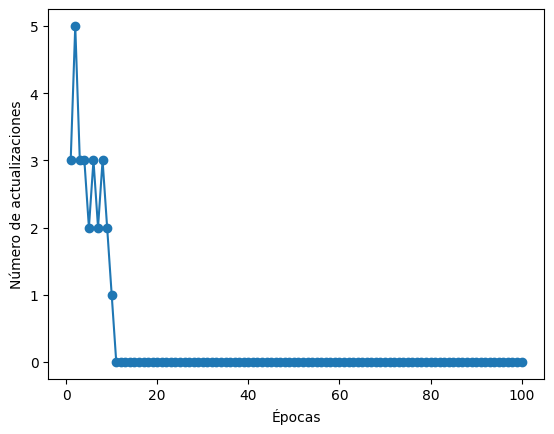

In [27]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

De manera analítica, se evalua la variabilidad de los **hiperparámetros ** bias, w1, w2 y w3 en función de las iteraciones hasta llegar la convergencia (Solución del algoritmo) cuando el error es igual a 0:

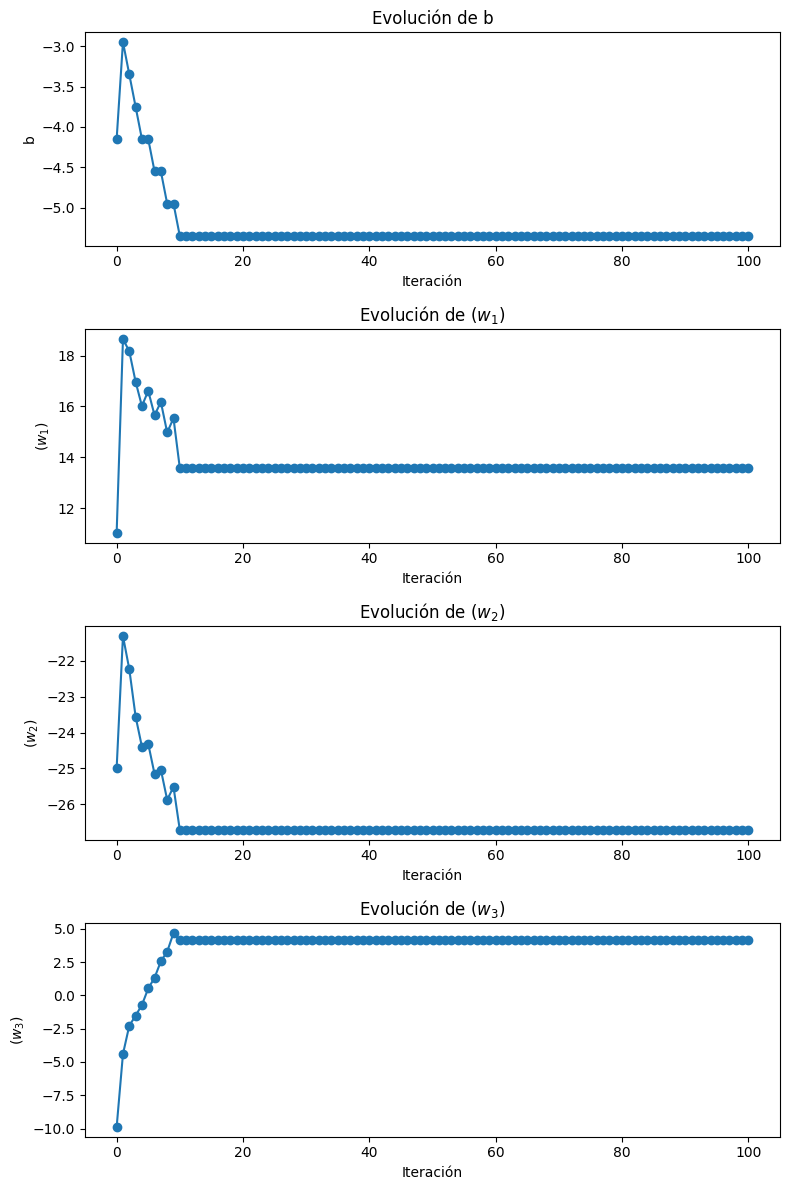

In [31]:
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)', '($w_3$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

A continuación se puede observar los valores finales de los pesos sinápticos y bias que están distribuidos de la siguiente manera:


*   **w_historial[-1][0]** = bias
*   **w_historial[-1][1]** = w1
*   **w_historial[-1][2]** = w2
*   **w_historial[-1][3]** = w3



In [32]:
print(ppn.w_historical[-1])

[ -5.34889976  13.57622467 -26.71428126   4.11662863]


Se procede a graficar el plano resultante:

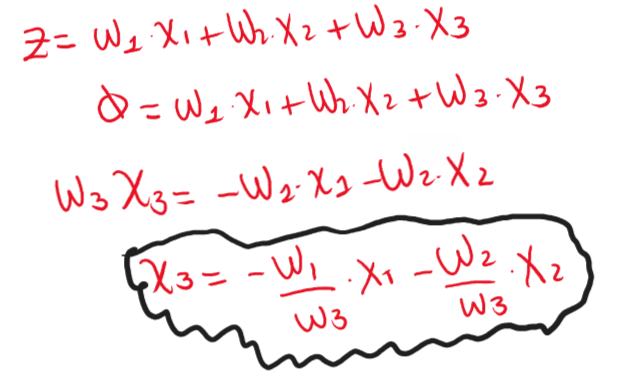



In [34]:
import plotly.graph_objs as go
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = df[df['target'] == 0].index
class_1_indices = df[df['target'] == 1].index
class_2_indices = df[df['target'] == 2].index

class_0_data = df.loc[class_0_indices, :]
class_1_data = df.loc[class_1_indices, :]
class_2_data = df.loc[class_2_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])

# Seleccionar tres características que permitan la mejor separabilidad
best_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['target'].values

b=ppn.w_historical[-1][0]
w1=ppn.w_historical[-1][1]
w2=ppn.w_historical[-1][2]
w3=ppn.w_historical[-1][3]


# Crear puntos para el plano
x_plane = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_plane = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3

# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Iris {iris.target_names[int(label)]})'
    ))

# Añadir el plano
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features[0]),
        yaxis=dict(title=best_features[1]),
        zaxis=dict(title=best_features[2])
    ),
    title='3D Scatter Plot of Two Iris Classes with Plane'
)

# Mostrar la figura interactiva
fig.show()
